In [73]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy.linalg import norm
from scipy.stats import linregress
from mpl_toolkits.mplot3d import Axes3D

import sys
sys.path.append('..')

import modules.mean_shift as ms
import modules.plotting as pl
import modules.math_funcs as mf
import modules.general as gen
import modules.signals as sig

In [74]:
%matplotlib inline

In [75]:
directory = os.path.join('..', 'data', 'pickles')

file_name = '2014-12-16_P005_Pre_002_df_pass.pkl'
file_path = os.path.join(directory, file_name)

df_pass = pd.read_pickle(file_path)
frames = df_pass.index

In [76]:
foot_dist = (df_pass.L_FOOT - df_pass.R_FOOT).apply(norm)

In [77]:
frames = foot_dist.index.values

In [78]:
masses = 1 - mf.normalize_array(foot_dist.values)

labels, centroids, k = ms.cluster(frames.reshape(-1, 1), masses=masses, kernel='gaussian', radius=5)

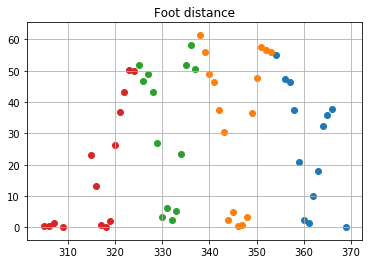

In [79]:
foot_dist_points = foot_dist.reset_index().values

plt.figure()
pl.scatter_labels(foot_dist_points, labels)
plt.title('Foot distance')
plt.grid()
plt.show()

In [80]:
frames = foot_dist.index.values

In [81]:
deriv = sig.window_derivative(foot_dist, 5)
deriv_2 = sig.window_derivative(deriv, 5)

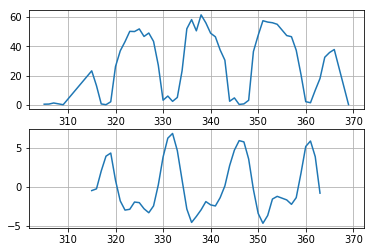

In [82]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2, sharex=ax1)

ax1.plot(foot_dist)
ax1.grid()

ax2.plot(deriv_2)
ax2.grid()

plt.show()

In [83]:
deriv_2 = deriv_2.dropna()

points = deriv_2.index.values.reshape(-1, 1)
masses = mf.normalize_array(deriv_2.values)

In [84]:
labels, centroids, k = ms.cluster(points, masses=masses, kernel='gaussian', radius=3)

In [85]:
deriv_2_points = deriv_2.reset_index().values


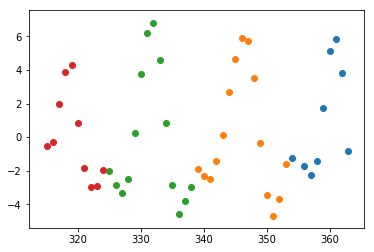

In [86]:
pl.scatter_labels(deriv_2_points, labels)